In [70]:
import glob
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
files = glob.glob('/content/drive/MyDrive/data/earthquake/*')

In [7]:
files

['/content/drive/MyDrive/data/earthquake/earthquake_ja_20170901_20171231.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20181001_20181231.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20170101_20170430.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20170501_20170831.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20180701_20180930.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20190701_20191231.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20200701_20201225.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20180101_20180630.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20190101_20190630.csv',
 '/content/drive/MyDrive/data/earthquake/earthquake_ja_20200101_20200630.csv']

In [8]:
dfs = [pd.read_csv(f) for f in files]

In [9]:
df = pd.concat(dfs)

In [10]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度
0,2017/12/31,22:40:06.9,秋田県内陸南部,39°31.3′N,140°25.7′E,9 km,2.9,震度２
1,2017/12/31,21:24:09.7,宮古島近海,24°17.9′N,125°10.5′E,34 km,4.3,震度１
2,2017/12/31,21:01:12.7,沖縄本島近海,26°31.2′N,126°58.9′E,15 km,3,震度１
3,2017/12/31,20:21:30.0,福島県会津,37°12.7′N,139°54.4′E,7 km,2.7,震度１
4,2017/12/31,12:48:59.0,トカラ列島近海,29°36.8′N,129°31.8′E,165 km,4.9,震度２
...,...,...,...,...,...,...,...,...
908,2020/01/03,03:23:53.3,千葉県東方沖,35°48.6′N,141°06.9′E,34 km,5.8,震度４
909,2020/01/02,06:26:47.9,熊本県熊本地方,32°51.6′N,130°52.5′E,11 km,2.1,震度１
910,2020/01/01,19:49:15.8,岩手県内陸南部,39°21.3′N,141°12.3′E,10 km,3.1,震度１
911,2020/01/01,10:12:16.5,浦河沖,41°48.5′N,142°30.4′E,69 km,3.6,震度１


In [11]:
dt.strptime('2018/09/30 19:20:24', '%Y/%m/%d %H:%M:%S')

datetime.datetime(2018, 9, 30, 19, 20, 24)

In [12]:
df['datetime'] = df.apply(
    lambda x: dt.strptime(f'{x["地震の発生日"]} {x["地震の発生時刻"].split(".")[0]}', '%Y/%m/%d %H:%M:%S'),
    axis=1
)

In [13]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime
0,2017/12/31,22:40:06.9,秋田県内陸南部,39°31.3′N,140°25.7′E,9 km,2.9,震度２,2017-12-31 22:40:06
1,2017/12/31,21:24:09.7,宮古島近海,24°17.9′N,125°10.5′E,34 km,4.3,震度１,2017-12-31 21:24:09
2,2017/12/31,21:01:12.7,沖縄本島近海,26°31.2′N,126°58.9′E,15 km,3,震度１,2017-12-31 21:01:12
3,2017/12/31,20:21:30.0,福島県会津,37°12.7′N,139°54.4′E,7 km,2.7,震度１,2017-12-31 20:21:30
4,2017/12/31,12:48:59.0,トカラ列島近海,29°36.8′N,129°31.8′E,165 km,4.9,震度２,2017-12-31 12:48:59
...,...,...,...,...,...,...,...,...,...
908,2020/01/03,03:23:53.3,千葉県東方沖,35°48.6′N,141°06.9′E,34 km,5.8,震度４,2020-01-03 03:23:53
909,2020/01/02,06:26:47.9,熊本県熊本地方,32°51.6′N,130°52.5′E,11 km,2.1,震度１,2020-01-02 06:26:47
910,2020/01/01,19:49:15.8,岩手県内陸南部,39°21.3′N,141°12.3′E,10 km,3.1,震度１,2020-01-01 19:49:15
911,2020/01/01,10:12:16.5,浦河沖,41°48.5′N,142°30.4′E,69 km,3.6,震度１,2020-01-01 10:12:16


In [14]:
df.sort_values(by='datetime', inplace=True)

In [15]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime
638,2017/01/01,01:46:06.8,有明海,32°44.1′N,130°23.7′E,11 km,3.6,震度２,2017-01-01 01:46:06
637,2017/01/01,05:44:51.5,宮城県沖,38°32.0′N,141°42.9′E,54 km,3.8,震度１,2017-01-01 05:44:51
636,2017/01/01,06:08:05.1,沖縄本島近海,26°13.5′N,128°41.5′E,39 km,4.5,震度１,2017-01-01 06:08:05
635,2017/01/01,07:05:29.1,宮城県沖,38°51.8′N,142°17.3′E,45 km,3.1,震度１,2017-01-01 07:05:29
634,2017/01/01,07:07:48.3,茨城県北部,36°44.5′N,140°36.8′E,7 km,3.7,震度２,2017-01-01 07:07:48
...,...,...,...,...,...,...,...,...,...
4,2020/12/25,05:35:06.6,長野県中部,36°14.0′N,137°38.9′E,4 km,3.3,震度１,2020-12-25 05:35:06
3,2020/12/25,05:38:30.5,種子島近海,30°49.9′N,130°30.5′E,105 km,4.4,震度２,2020-12-25 05:38:30
2,2020/12/25,06:27:25.6,宮城県北部,38°47.4′N,141°28.3′E,101 km,4.1,震度２,2020-12-25 06:27:25
1,2020/12/25,13:12:13.8,熊本県天草・芦北地方,32°38.8′N,130°39.4′E,11 km,2.1,震度１,2020-12-25 13:12:13


In [16]:
df = df[df['Ｍ']!='不明']

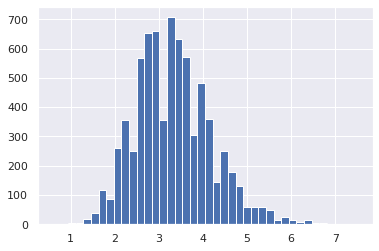

In [17]:
df['Ｍ'].astype(np.float).hist(bins=40)

In [65]:
df['Ｍ'] = df['Ｍ'].astype(np.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
 df['最大震度'].value_counts()

震度１     4837
震度２     1859
震度３      556
震度４      167
震度５弱      23
震度５強       7
震度６弱       3
震度６強       1
震度７        1
Name: 最大震度, dtype: int64

In [19]:
 df[df['最大震度']=='震度７']

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime
381,2018/09/06,03:07:59.3,胆振地方中東部,42°41.4′N,142°00.4′E,37 km,6.7,震度７,2018-09-06 03:07:59


In [20]:
df['震央地名'].unique()

array(['有明海', '宮城県沖', '沖縄本島近海', '茨城県北部', '日高地方中部', '青森県東方沖', '熊本県熊本地方',
       '千葉県北東部', '三重県南東沖', '三宅島近海', '種子島近海', '鳥取県中部', '茨城県沖', '西表島付近',
       '三重県中部', '福島県沖', '秋田県内陸南部', '奄美大島北東沖', '熊本県天草・芦北地方', '鹿児島湾',
       '大阪府北部', '山梨県中・西部', 'トカラ列島近海', '岐阜県美濃中西部', 'インドネシア付近', '小笠原諸島西方沖',
       '福島県中通り', '茨城県南部', '和歌山県北部', '福島県会津', '熊本県阿蘇地方', '渡島地方西部', '宮城県北部',
       '東京湾', '奈良県', '岩手県沖', '伊予灘', '石川県西方沖', '岩手県内陸北部', '宮崎県南部平野部',
       '千葉県北西部', '新島・神津島近海', '岩手県沿岸北部', '父島近海', '宮古島近海', '福井県嶺北', '浦河沖',
       '宗谷東方沖', '長野県南部', '千葉県東方沖', '三陸沖', '根室地方南部', '静岡県中部', '大阪湾',
       '徳島県北部', '根室半島南東沖', '留萌地方南部', '根室地方北部', '兵庫県南東部', '奄美大島近海', '苫小牧沖',
       '大隅半島東方沖', '千葉県南部', '四国沖', '五島列島近海', '北海道北西沖', '宮崎県南部山沿い', '土佐湾',
       '山梨県東部・富士五湖', '岐阜県飛騨地方', '群馬県南部', '網走地方', '周防灘', '日向灘', '鹿児島県薩摩地方',
       '紀伊水道', '天草灘', '日高地方東部', '小笠原諸島東方沖', '国後島付近', '与那国島近海', '留萌地方中北部',
       '山口県中部', '十勝地方南部', '大分県中部', '釧路沖', '台湾付近', '島根県東部', '熊本県球磨地方',
       '福岡県北西沖', '日高地方西部', '伊豆大島近海', '秋田県内陸北部', '岩手県沿岸南部', '滋賀県

In [25]:
df['lat'] = df['緯度'].map(lambda x: str(x).replace('.', '').replace('′N', '').replace('°', '.')).astype(float)
df['lon'] = df['経度'].map(lambda x: str(x).replace('.', '').replace('′E', '').replace('°', '.')).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime,lat,lon
638,2017/01/01,01:46:06.8,有明海,32°44.1′N,130°23.7′E,11 km,3.6,震度２,2017-01-01 01:46:06,32.441,130.237
637,2017/01/01,05:44:51.5,宮城県沖,38°32.0′N,141°42.9′E,54 km,3.8,震度１,2017-01-01 05:44:51,38.320,141.429
636,2017/01/01,06:08:05.1,沖縄本島近海,26°13.5′N,128°41.5′E,39 km,4.5,震度１,2017-01-01 06:08:05,26.135,128.415
635,2017/01/01,07:05:29.1,宮城県沖,38°51.8′N,142°17.3′E,45 km,3.1,震度１,2017-01-01 07:05:29,38.518,142.173
634,2017/01/01,07:07:48.3,茨城県北部,36°44.5′N,140°36.8′E,7 km,3.7,震度２,2017-01-01 07:07:48,36.445,140.368
...,...,...,...,...,...,...,...,...,...,...,...
4,2020/12/25,05:35:06.6,長野県中部,36°14.0′N,137°38.9′E,4 km,3.3,震度１,2020-12-25 05:35:06,36.140,137.389
3,2020/12/25,05:38:30.5,種子島近海,30°49.9′N,130°30.5′E,105 km,4.4,震度２,2020-12-25 05:38:30,30.499,130.305
2,2020/12/25,06:27:25.6,宮城県北部,38°47.4′N,141°28.3′E,101 km,4.1,震度２,2020-12-25 06:27:25,38.474,141.283
1,2020/12/25,13:12:13.8,熊本県天草・芦北地方,32°38.8′N,130°39.4′E,11 km,2.1,震度１,2020-12-25 13:12:13,32.388,130.394


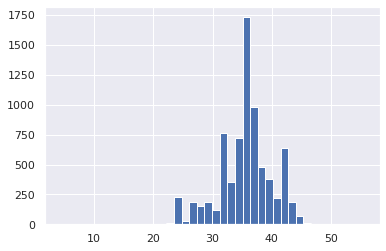

In [28]:
df['lat'].hist(bins=40)

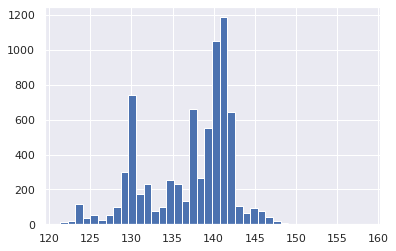

In [29]:
df['lon'].hist(bins=40)

In [34]:
df['lat_label'] = pd.cut(df['lat'], bins=10, labels=range(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['lon_label'] = pd.cut(df['lon'], bins=10, labels=range(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df['lat_lon_label'] = df.apply(
    lambda x: f'{x["lat_label"]}_{x["lon_label"]}',
    axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime,lat,lon,lat_label,lon_label,lat_lon_label
638,2017/01/01,01:46:06.8,有明海,32°44.1′N,130°23.7′E,11 km,3.6,震度２,2017-01-01 01:46:06,32.441,130.237,5,2,5_2
637,2017/01/01,05:44:51.5,宮城県沖,38°32.0′N,141°42.9′E,54 km,3.8,震度１,2017-01-01 05:44:51,38.320,141.429,6,5,6_5
636,2017/01/01,06:08:05.1,沖縄本島近海,26°13.5′N,128°41.5′E,39 km,4.5,震度１,2017-01-01 06:08:05,26.135,128.415,4,1,4_1
635,2017/01/01,07:05:29.1,宮城県沖,38°51.8′N,142°17.3′E,45 km,3.1,震度１,2017-01-01 07:05:29,38.518,142.173,6,5,6_5
634,2017/01/01,07:07:48.3,茨城県北部,36°44.5′N,140°36.8′E,7 km,3.7,震度２,2017-01-01 07:07:48,36.445,140.368,6,5,6_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020/12/25,05:35:06.6,長野県中部,36°14.0′N,137°38.9′E,4 km,3.3,震度１,2020-12-25 05:35:06,36.140,137.389,6,4,6_4
3,2020/12/25,05:38:30.5,種子島近海,30°49.9′N,130°30.5′E,105 km,4.4,震度２,2020-12-25 05:38:30,30.499,130.305,5,2,5_2
2,2020/12/25,06:27:25.6,宮城県北部,38°47.4′N,141°28.3′E,101 km,4.1,震度２,2020-12-25 06:27:25,38.474,141.283,6,5,6_5
1,2020/12/25,13:12:13.8,熊本県天草・芦北地方,32°38.8′N,130°39.4′E,11 km,2.1,震度１,2020-12-25 13:12:13,32.388,130.394,5,2,5_2


In [40]:
df['lat_lon_label'].value_counts()

6_5    2059
6_4    1302
5_2    1087
7_5     809
5_3     523
4_2     303
5_4     289
7_6     253
3_0     176
4_1     169
6_3     138
4_5      63
6_2      59
3_1      57
5_5      49
7_7      33
7_4      20
4_0      12
5_1      10
6_6       9
3_5       7
8_6       5
8_5       4
4_4       4
4_6       3
9_8       2
2_6       2
0_0       1
7_2       1
8_8       1
8_9       1
3_6       1
9_9       1
7_8       1
Name: lat_lon_label, dtype: int64

In [49]:
min_dt = df['datetime'].min().date()
print(min_dt)

2017-01-01


In [50]:
max_dt = df['datetime'].max().date()
print(max_dt)

2020-12-25


In [51]:
df_earthquake_timeseries = pd.DataFrame(
    index=pd.date_range(min_dt, max_dt)
)

In [52]:
df_earthquake_timeseries

""
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
...
2020-12-21
2020-12-22
2020-12-23
2020-12-24


In [53]:
df[df['lat_lon_label']=='7_4']

,地震の発生日,地震の発生時刻,震央地名,緯度,経度,深さ,Ｍ,最大震度,datetime,lat,lon,lat_label,lon_label,lat_lon_label
199,2017/03/28,07:31:23.2,北海道南西沖,42°00.4′N,138°42.1′E,31 km,5.0,震度１,2017-03-28 07:31:23,42.004,138.421,7,4,7_4
705,2017/05/11,15:44:01.7,北海道南西沖,41°44.4′N,138°58.1′E,32 km,3.7,震度１,2017-05-11 15:44:01,41.444,138.581,7,4,7_4
112,2017/08/11,23:05:12.5,北海道南西沖,42°49.1′N,139°55.6′E,14 km,3.4,震度１,2017-08-11 23:05:12,42.491,139.556,7,4,7_4
256,2017/11/06,13:34:58.3,北海道南西沖,41°50.8′N,139°24.9′E,20 km,3.8,震度２,2017-11-06 13:34:58,41.508,139.249,7,4,7_4
222,2017/11/13,13:22:09.7,青森県津軽南部,40°31.1′N,139°59.7′E,9 km,2.9,震度１,2017-11-13 13:22:09,40.311,139.597,7,4,7_4
855,2018/01/24,12:24:18.2,北海道南西沖,42°23.9′N,139°21.0′E,18 km,3.4,震度１,2018-01-24 12:24:18,42.239,139.210,7,4,7_4
651,2018/03/09,03:59:14.6,青森県西方沖,40°43.8′N,139°12.3′E,27 km,3.1,震度１,2018-03-09 03:59:14,40.438,139.123,7,4,7_4
619,2018/03/15,20:33:07.4,北海道南西沖,42°12.2′N,139°29.7′E,8 km,2.9,震度２,2018-03-15 20:33:07,42.122,139.297,7,4,7_4
464,2018/04/12,16:56:53.2,北海道西方沖,43°39.0′N,139°35.3′E,226 km,5.1,震度１,2018-04-12 16:56:53,43.390,139.353,7,4,7_4
385,2018/04/27,13:40:21.6,北海道南西沖,42°37.0′N,139°13.1′E,25 km,3.1,震度１,2018-04-27 13:40:21,42.370,139.131,7,4,7_4


In [63]:
MAX_EFFECT_DAYS = 20
DECAY_RATE = 0.2

2017-01-01    0
2017-01-02    0
2017-01-03    0
2017-01-04    0
2017-01-05    0
             ..
2020-12-21    0
2020-12-22    0
2020-12-23    0
2020-12-24    0
2020-12-25    0
Freq: D, Length: 1455, dtype: int64

$$
    earthquake_i\_effect = magnitude_i^2\times\exp(-decay\_rate\times(date-date_{earthquake(i)}))
$$

$$
    date_{earthquake(i)} \leq date < date_{earthquake(i)}+ max\_effect\_days
$$


$$
    total\_earthquake\_effect = \sum_i earthquake_i\_effect
$$

In [56]:
from datetime import timedelta

In [66]:
sr_eathquake_timeseries = pd.Series(
    index=pd.date_range(min_dt, max_dt),
    data=[0]*len(pd.date_range(min_dt, max_dt))
)

for dt, M in zip(df[df['lat_lon_label']=='7_4']['datetime'], df[df['lat_lon_label']=='7_4']['Ｍ']):
    effect_ts = sr_eathquake_timeseries[dt.date():dt.date()+timedelta(days=MAX_EFFECT_DAYS-1)] + M**2 * np.exp(-DECAY_RATE*np.arange(MAX_EFFECT_DAYS))
    sr_eathquake_timeseries.loc[dt.date():dt.date()+timedelta(days=MAX_EFFECT_DAYS-1)] = effect_ts

In [67]:
sr_eathquake_timeseries

2017-01-01    0.0
2017-01-02    0.0
2017-01-03    0.0
2017-01-04    0.0
2017-01-05    0.0
             ... 
2020-12-21    0.0
2020-12-22    0.0
2020-12-23    0.0
2020-12-24    0.0
2020-12-25    0.0
Freq: D, Length: 1455, dtype: float64

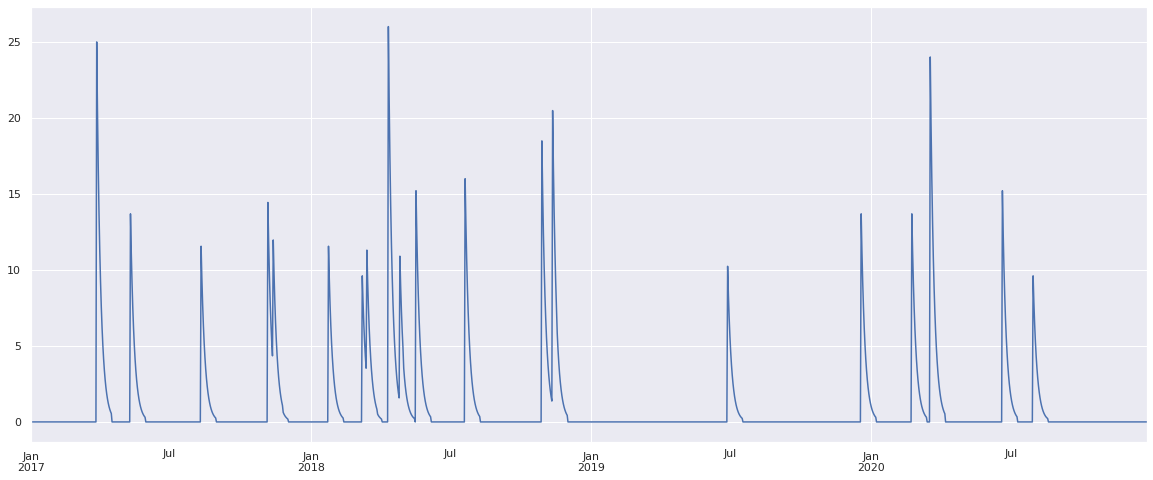

In [71]:
plt.figure(figsize=(20, 8))
sr_eathquake_timeseries.plot()

In [89]:
df_earthquake_timeseries = pd.DataFrame(
    index=pd.date_range(min_dt, max_dt+timedelta(days=MAX_EFFECT_DAYS-1))
)

In [90]:
for lat_lon_label in df['lat_lon_label'].unique():
    col_name = f'lat_lon_{lat_lon_label}'
    df_earthquake_timeseries[col_name] = [0]*len(df_earthquake_timeseries)

    for dt, M in zip(df[df['lat_lon_label']==lat_lon_label]['datetime'], df[df['lat_lon_label']==lat_lon_label]['Ｍ']):
        effect_ts = df_earthquake_timeseries.loc[dt.date():dt.date()+timedelta(days=MAX_EFFECT_DAYS-1), col_name] + M**2 * np.exp(-DECAY_RATE*np.arange(MAX_EFFECT_DAYS))
        df_earthquake_timeseries.loc[dt.date():dt.date()+timedelta(days=MAX_EFFECT_DAYS-1), col_name] = effect_ts.values

In [91]:
df_earthquake_timeseries

,lat_lon_5_2,lat_lon_6_5,lat_lon_4_1,lat_lon_7_5,lat_lon_5_4,lat_lon_6_3,lat_lon_3_0,lat_lon_5_3,lat_lon_4_2,lat_lon_6_4,lat_lon_0_0,lat_lon_4_5,lat_lon_3_1,lat_lon_7_6,lat_lon_4_6,lat_lon_6_6,lat_lon_5_5,lat_lon_7_4,lat_lon_7_7,lat_lon_8_5,lat_lon_4_0,lat_lon_3_5,lat_lon_4_4,lat_lon_7_2,lat_lon_7_8,lat_lon_6_2,lat_lon_8_8,lat_lon_8_6,lat_lon_5_1,lat_lon_9_8,lat_lon_2_6,lat_lon_8_9,lat_lon_3_6,lat_lon_9_9
2017-01-01,12.960000,51.830000,20.250000,21.530000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-02,20.850751,49.194815,16.579298,17.627273,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-03,37.321151,104.737308,13.573981,34.681991,35.890000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,41.085974,108.871655,11.113436,28.395212,29.384247,2.560000,9.610000,10.890000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,52.938350,232.736572,9.098912,23.248034,24.057786,2.095951,7.868003,8.915978,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-09,2.100487,3.952798,0.768920,1.358801,1.132168,0.366860,0.000000,0.528278,0.0,1.286364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-10,1.586212,3.236277,0.629539,0.000000,0.238456,0.300359,0.000000,0.432518,0.0,1.053185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-11,1.298681,2.462087,0.515423,0.000000,0.080758,0.245914,0.000000,0.354115,0.0,0.642304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-12,1.063270,0.874906,0.000000,0.000000,0.000000,0.201337,0.000000,0.289925,0.0,0.472942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


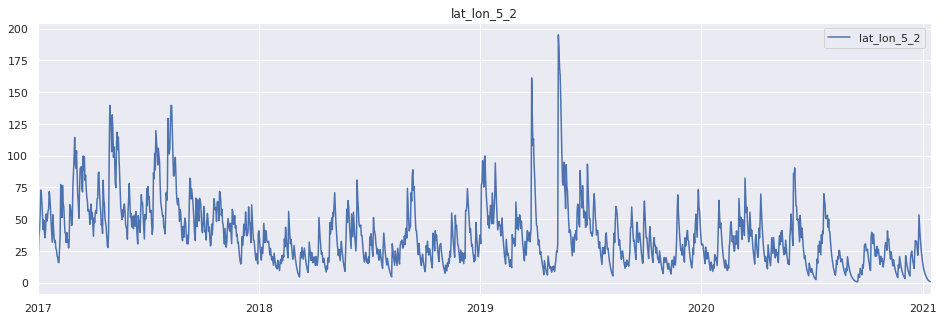

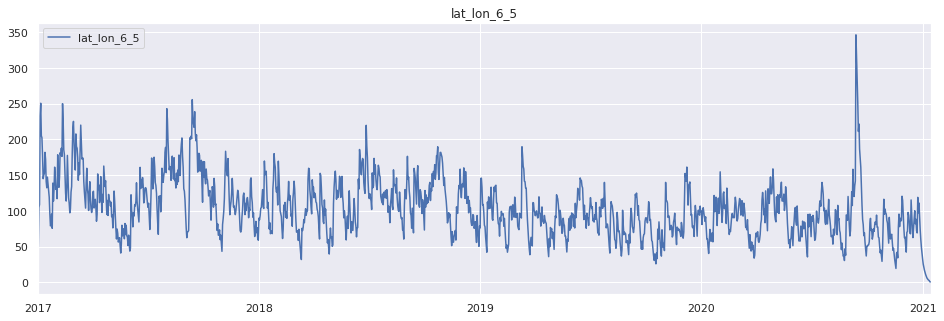

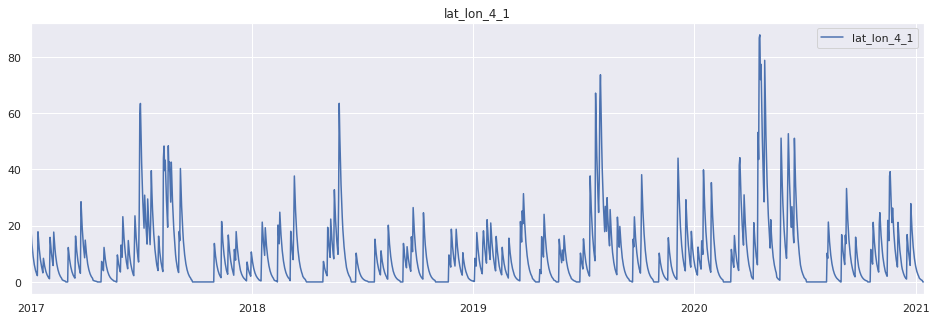

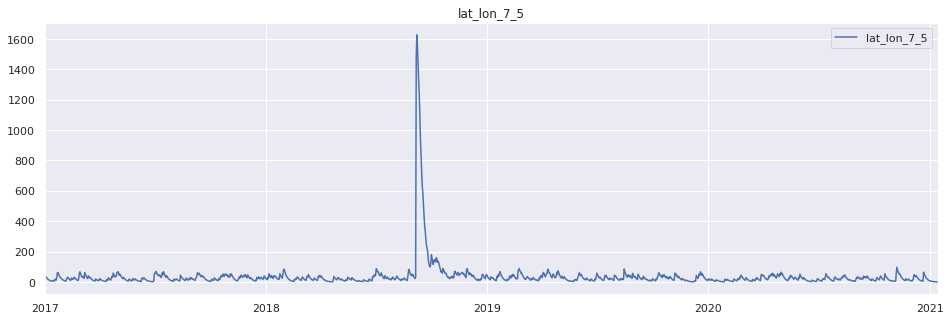

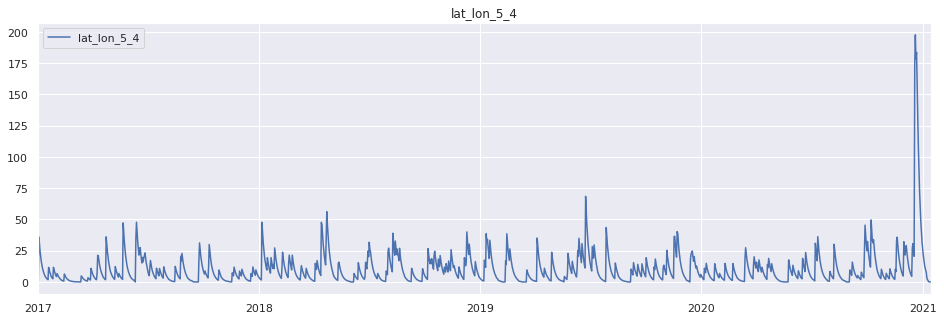

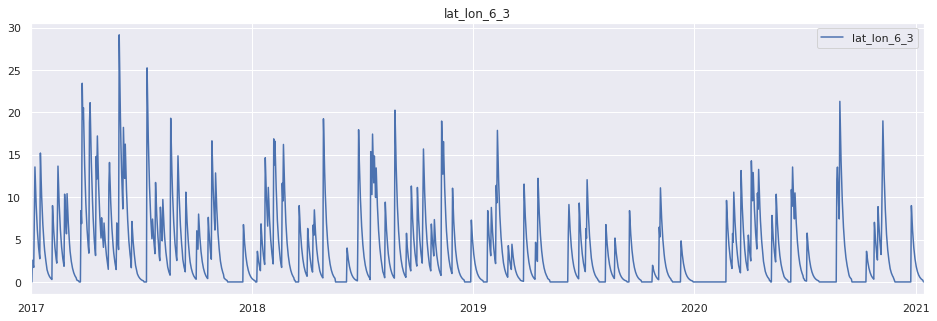

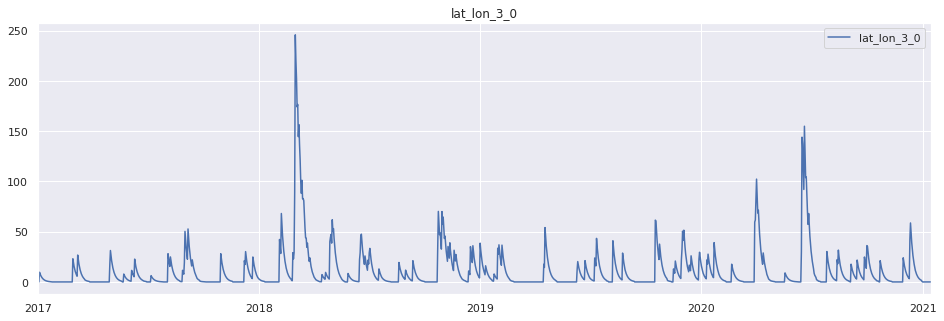

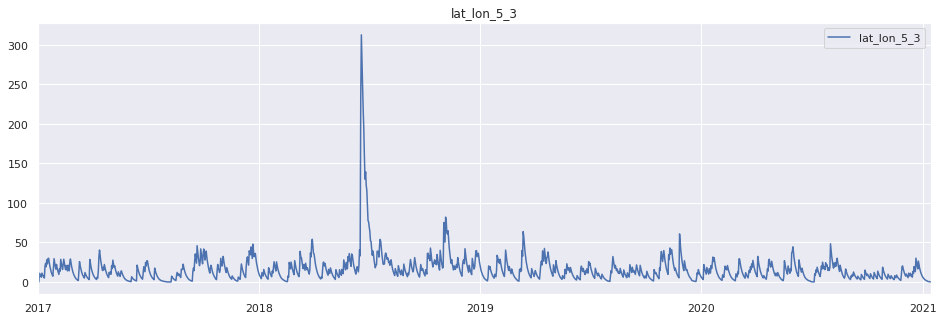

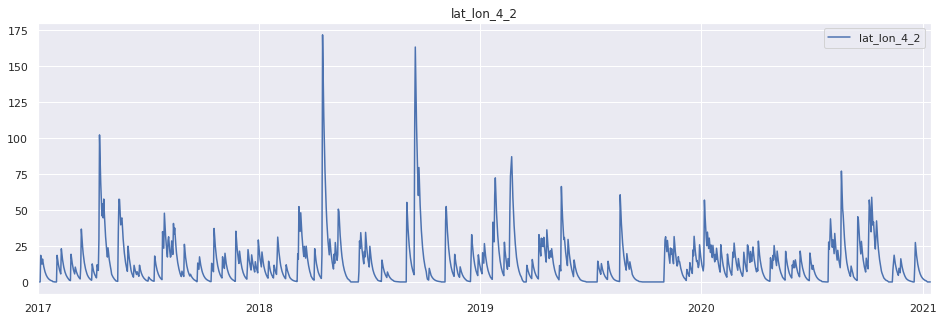

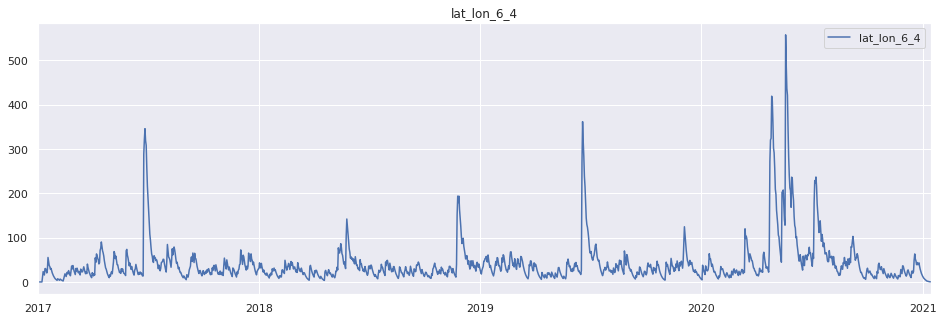

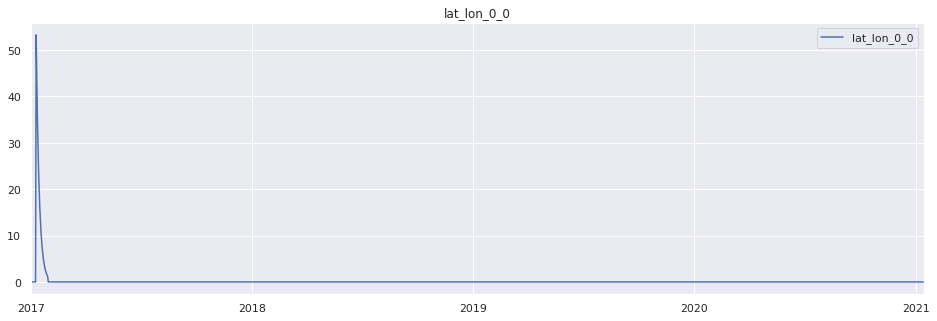

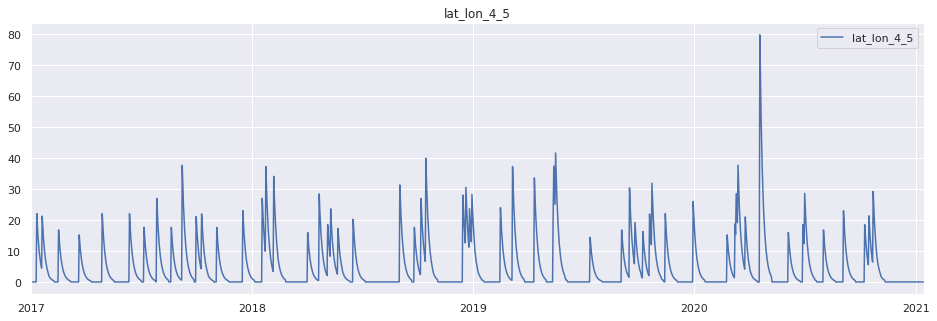

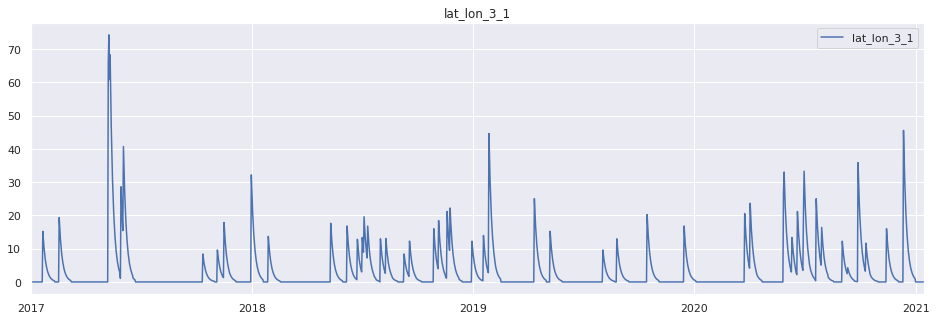

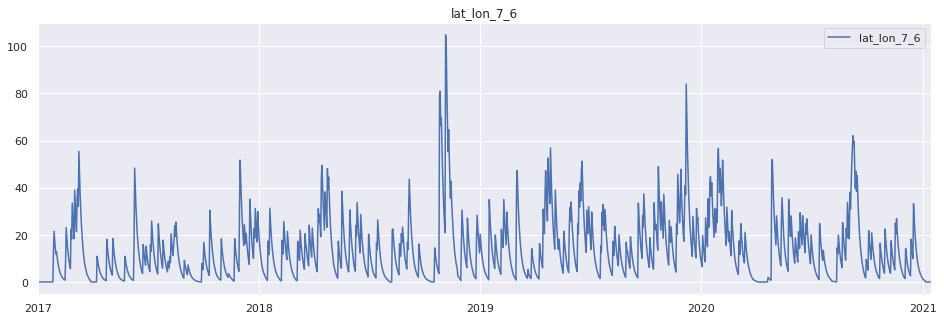

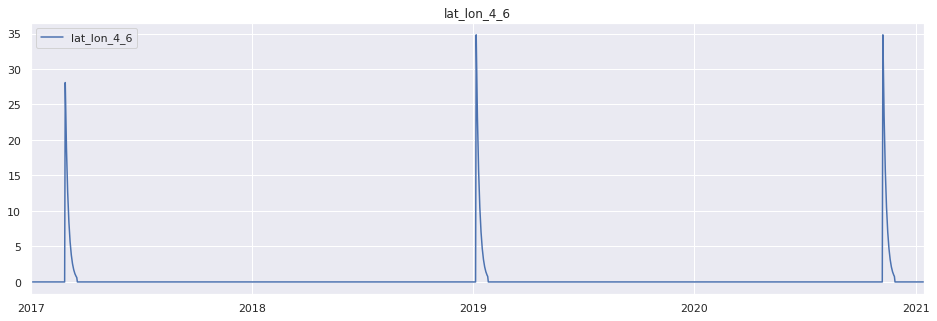

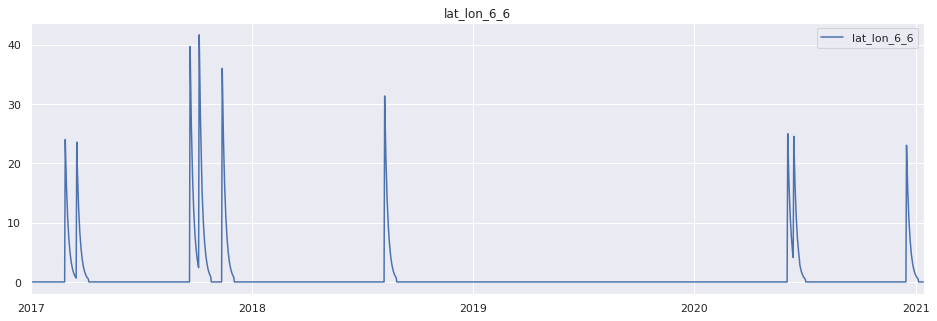

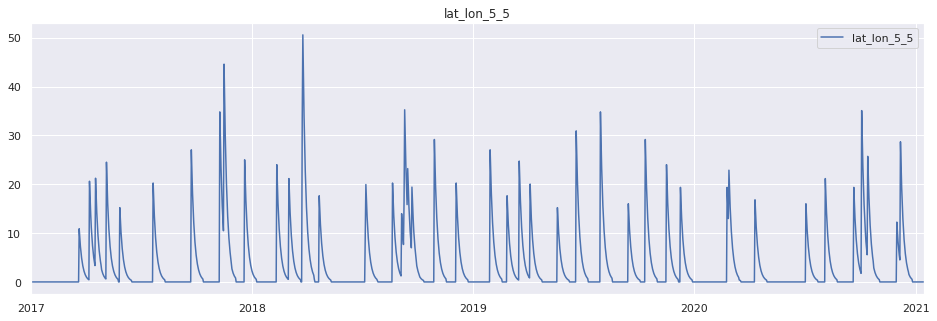

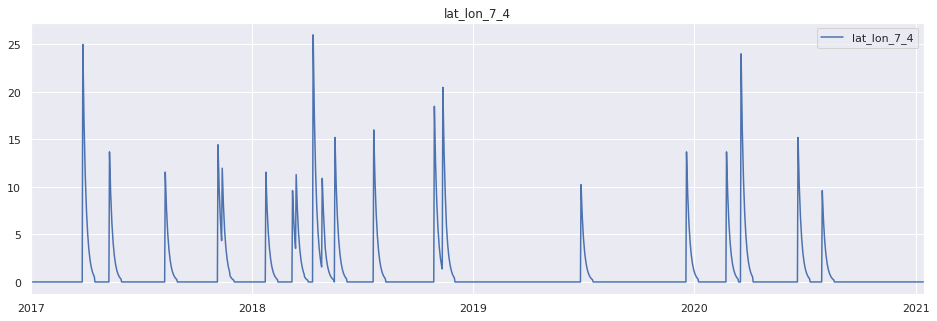

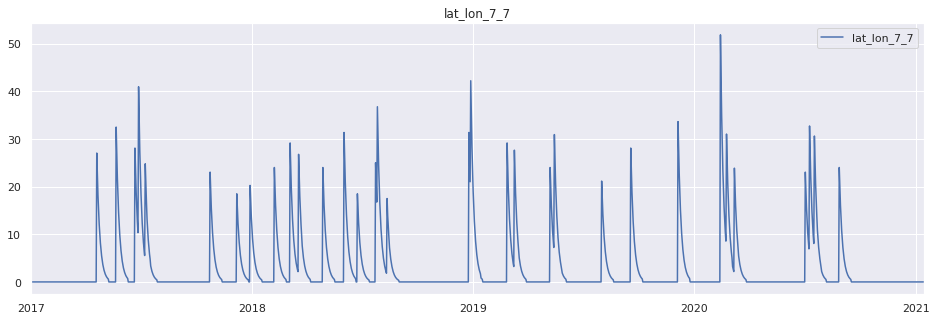

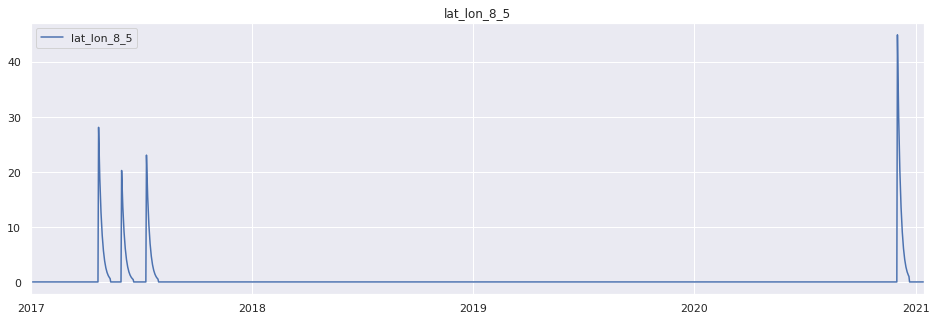

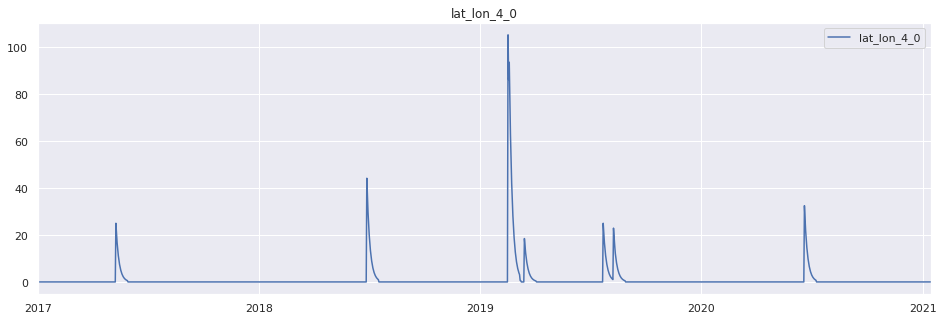

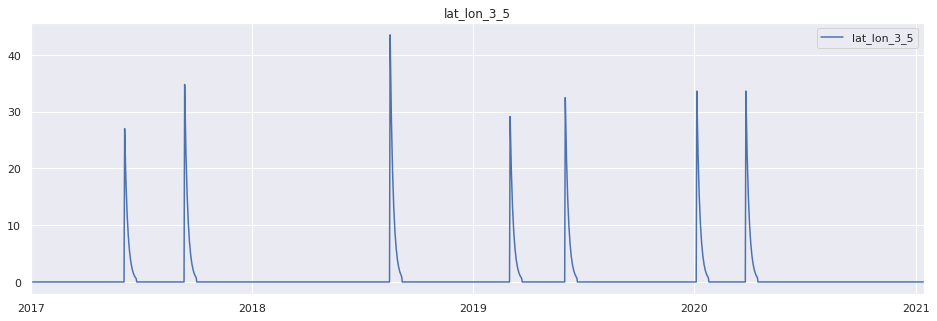

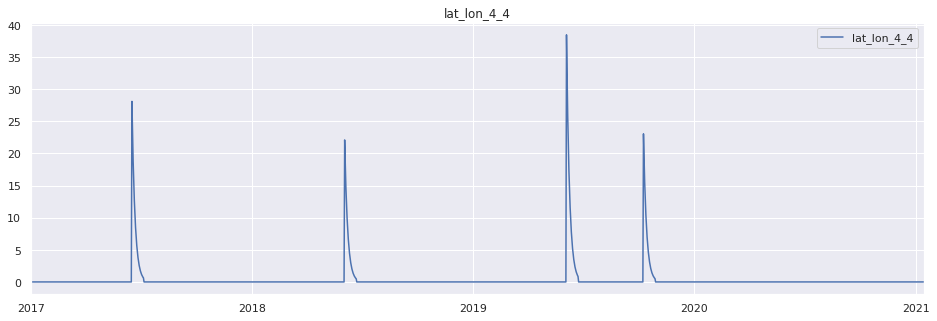

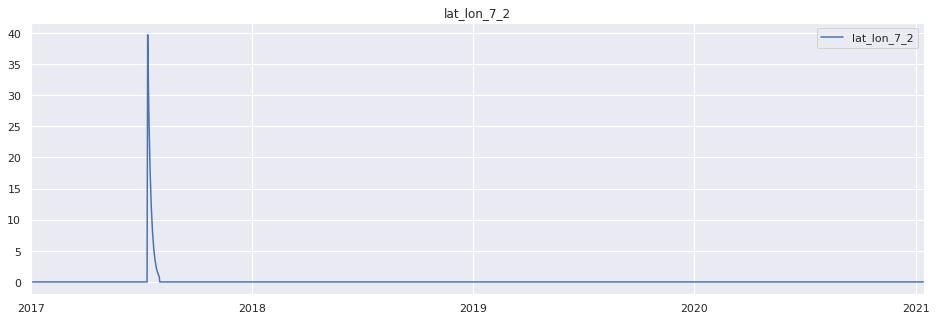

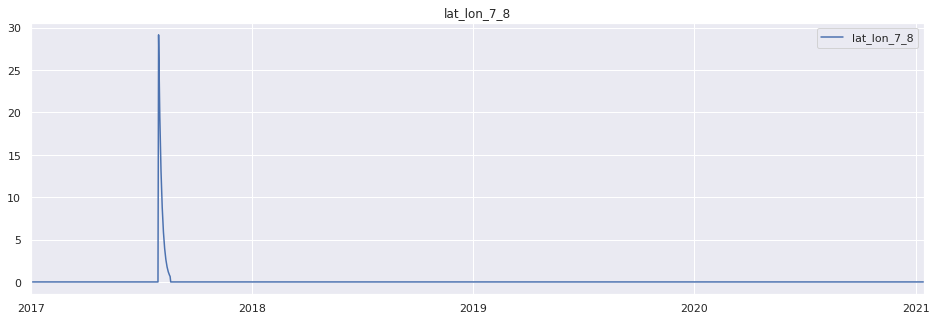

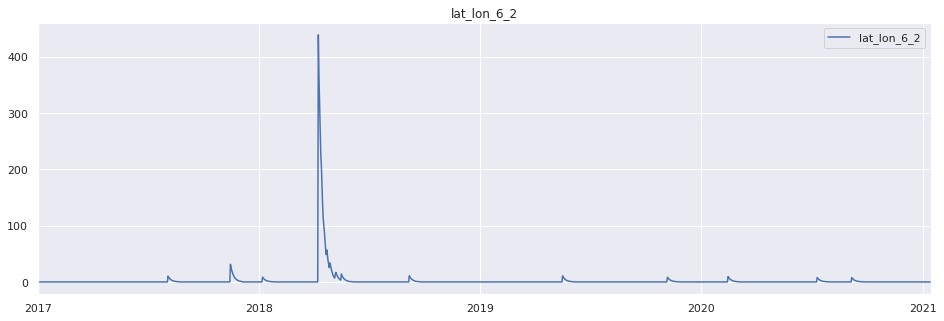

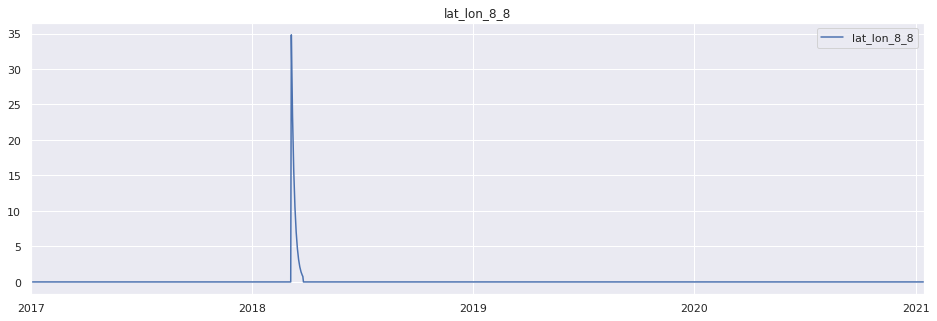

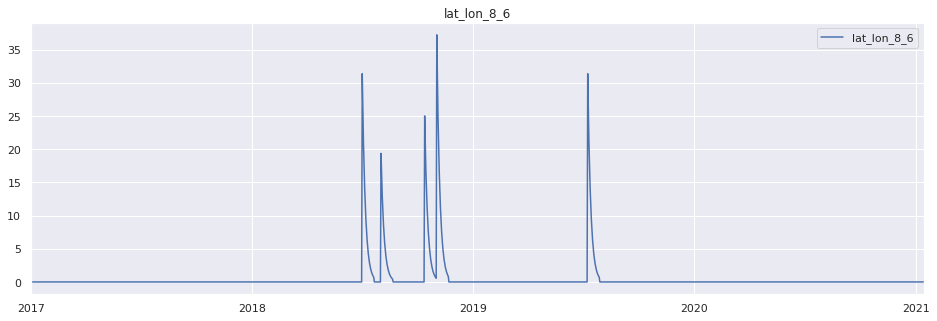

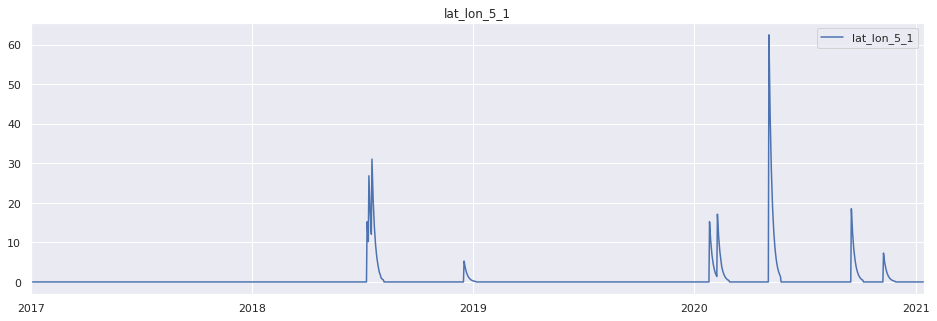

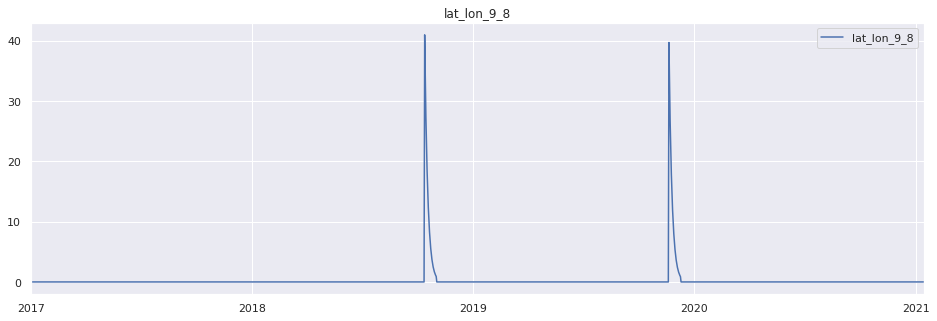

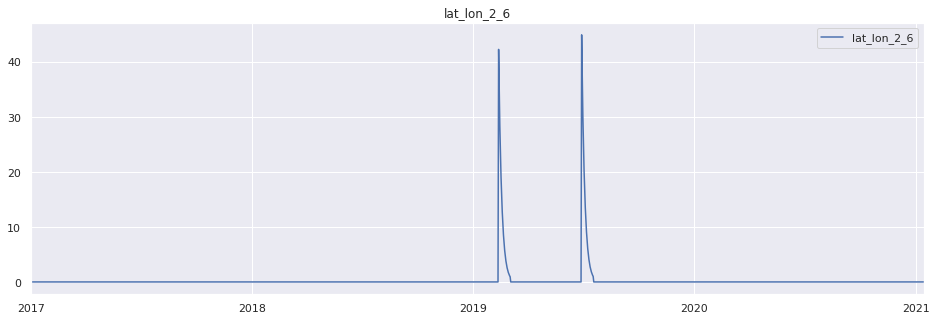

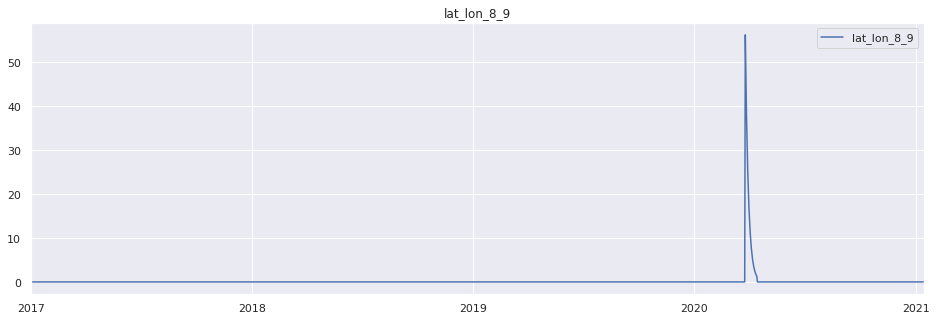

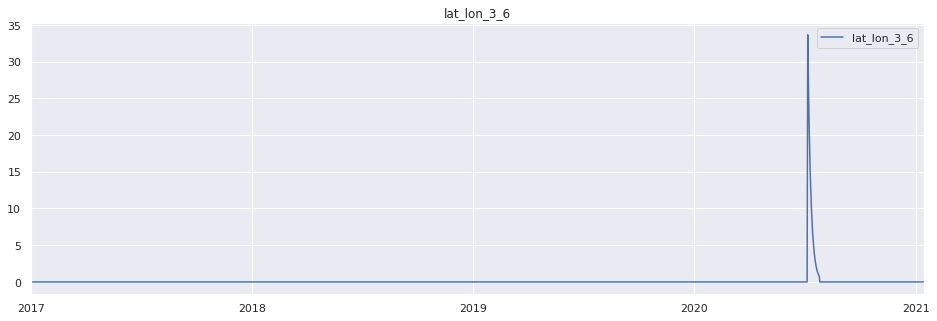

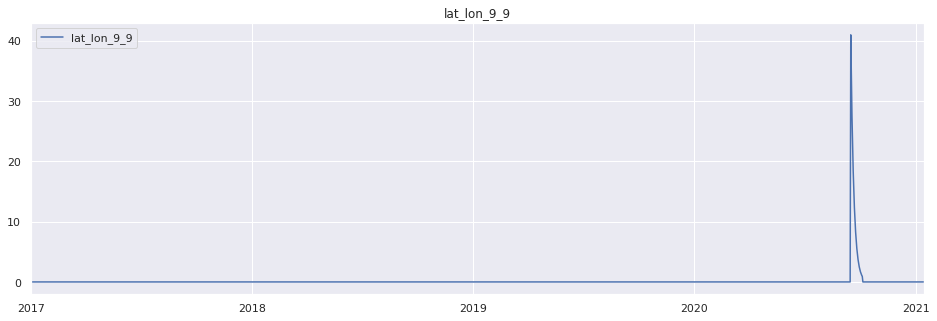

In [92]:
for col in df_earthquake_timeseries.columns:
    plt.figure(figsize=(16, 5))
    df_earthquake_timeseries[col].plot(label=col)
    plt.title(col)
    plt.legend()
    plt.show()